In [3]:
from tensorflow import keras
from  keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
input_shape = (150, 150, 3))

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base folder where Kaggle data is downloaded
base_dir = '/home/arif/Downloads/kaggle_original_data/dogs-vs-cats'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

In [5]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 24580 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━

In [10]:
from tensorflow import keras
from  keras.applications import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
input_shape = (150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=2e-5),
metrics=['acc'])

history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Found 24580 images belonging to 2 classes.
Found 12221 images belonging to 2 classes.
Epoch 1/30


/home/arif/anaconda3/envs/myenv1/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 564ms/step - acc: 0.7035 - loss: 0.5789 - val_acc: 0.8110 - val_loss: 0.4426
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - acc: 0.7745 - loss: 0.4927 - val_acc: 0.8350 - val_loss: 0.3816
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 625ms/step - acc: 0.7870 - loss: 0.4467 - val_acc: 0.8580 - val_loss: 0.3567
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 624ms/step - acc: 0.8220 - loss: 0.4103 - val_acc: 0.8550 - val_loss: 0.3315
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 631ms/step - acc: 0.8130 - loss: 0.4100 - val_acc: 0.8630 - val_loss: 0.3260
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 625ms/step - acc: 0.8235 - loss: 0.3832 - val_acc: 0.8530 - val_loss: 0.3102
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 633ms/step - acc: 0.8365 - loss: 0.3673 - val_acc: 0.8820 - val_loss: 0.2749
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 638ms/step - acc: 0.8440 - loss: 0.3602 - val_acc: 0.8710 - val_loss: 0.3087
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s

/home/arif/anaconda3/envs/myenv1/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - acc: 0.8483 - loss: 0.3631 - val_acc: 0.9040 - val_loss: 0.2377
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 628ms/step - acc: 0.8410 - loss: 0.3508 - val_acc: 0.8860 - val_loss: 0.2591
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 627ms/step - acc: 0.8505 - loss: 0.3371 - val_acc: 0.8860 - val_loss: 0.2587
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 626ms/step - acc: 0.8525 - loss: 0.3451 - val_acc: 0.9000 - val_loss: 0.2357
Epoch 17/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 625ms/step - acc: 0.8555 - loss: 0.3274 - val_acc: 0.9000 - val_loss: 0.2413
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 627ms/step - acc: 0.8575 - loss: 0.3367 - val_acc: 0.9030 - val_loss: 0.2308
Epoch 19/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 627ms/step - acc: 0.8465 - loss: 0.3460 - val_acc: 0.8950 - val_loss: 0.2401
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 627ms/step - acc: 0.8635 - loss: 0.3158 - val_acc: 0.8940 - val_loss: 0.2486
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━

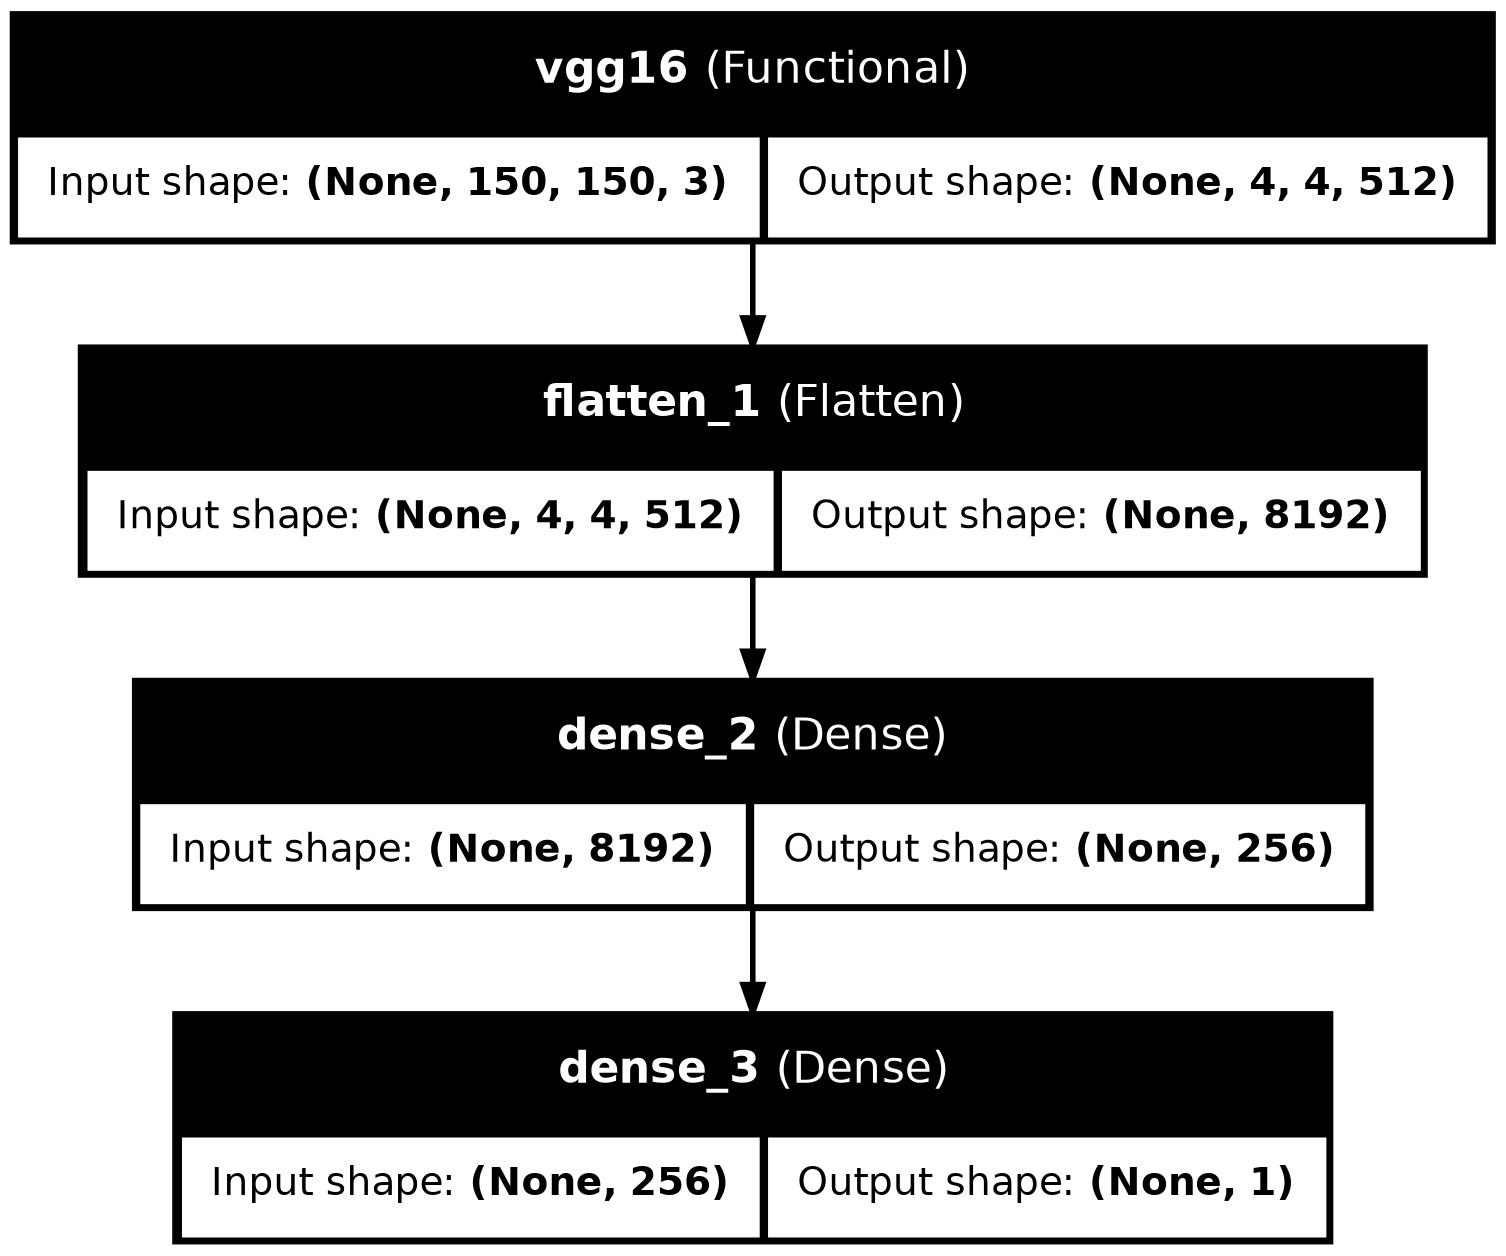

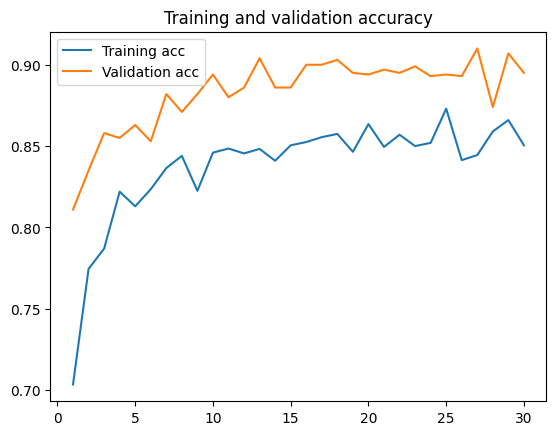

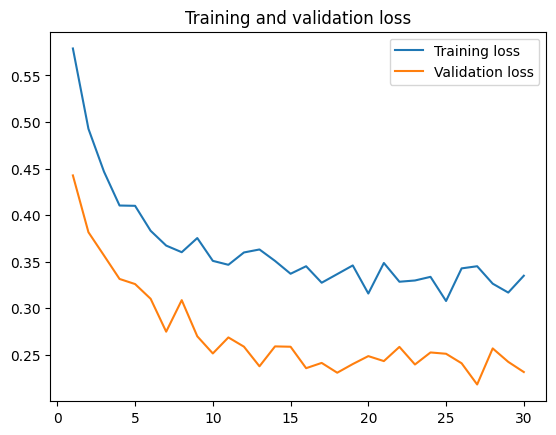

In [13]:
model.save('dogs_and_cats_test_2.h5')
history_dict = history.history
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label = 'Training acc')
plt.plot(epochs, val_acc, label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()


from tensorflow.keras.utils import plot_model

# Plot architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Use above train Covnet to test classiffication on real-time through webcam

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("dogs_and_cats_test_2.h5")

# Define labels
labels = ["Cat", "Dog"]

# Start webcam
cap = cv2.VideoCapture(0)  # Change index if needed (0,1,...)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess frame for model
    img = cv2.resize(frame, (150, 150))  # match your training size
    img = img.astype("float32") / 255.0  # rescale like training
    img = np.expand_dims(img, axis=0)    # shape (1,150,150,3)

    # Prediction
    prob = model.predict(img)[0][0]  # single sigmoid output
    label = labels[1] if prob > 0.5 else labels[0]
    confidence = prob if prob > 0.5 else 1 - prob

    # Put text on frame
    text = f"{label}: {confidence*100:.2f}%"
    cv2.putText(frame, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
                1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show video
    cv2.imshow("Dogs vs Cats - Real Time", frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━